----
# Laboratorium 10 - Filtry analogowe, część 1

----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskie

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Przypomnienie wiadomości o filtrach analogowych
### 0.3. Moduł transmitancji i tłumienie
### 0.4.  Gabaryty filtru
### 0.5.  Aproksymacje Butterwortha, Czebyszewa (1 i 2 rodzaju) i Cauera (eliptyczna)


In [1]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 



----

### Zadanie 1

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Butterwortha   
    - rząd filtru n (dla n od 1 do 5)  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedz:  
    - wykorzystaj funkcję `scipy.signal.butter`, pamiętaj aby zaprojektować filtr analogowy  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

5.988229988375398
tłumienie dla n= 1 jest 5.988230
12.040792697110916
tłumienie dla n= 2 jest 12.040793
18.061795464754738
tłumienie dla n= 3 jest 18.061795
24.082399609858697
tłumienie dla n= 4 jest 24.082400
30.102999565964254
tłumienie dla n= 5 jest 30.103000


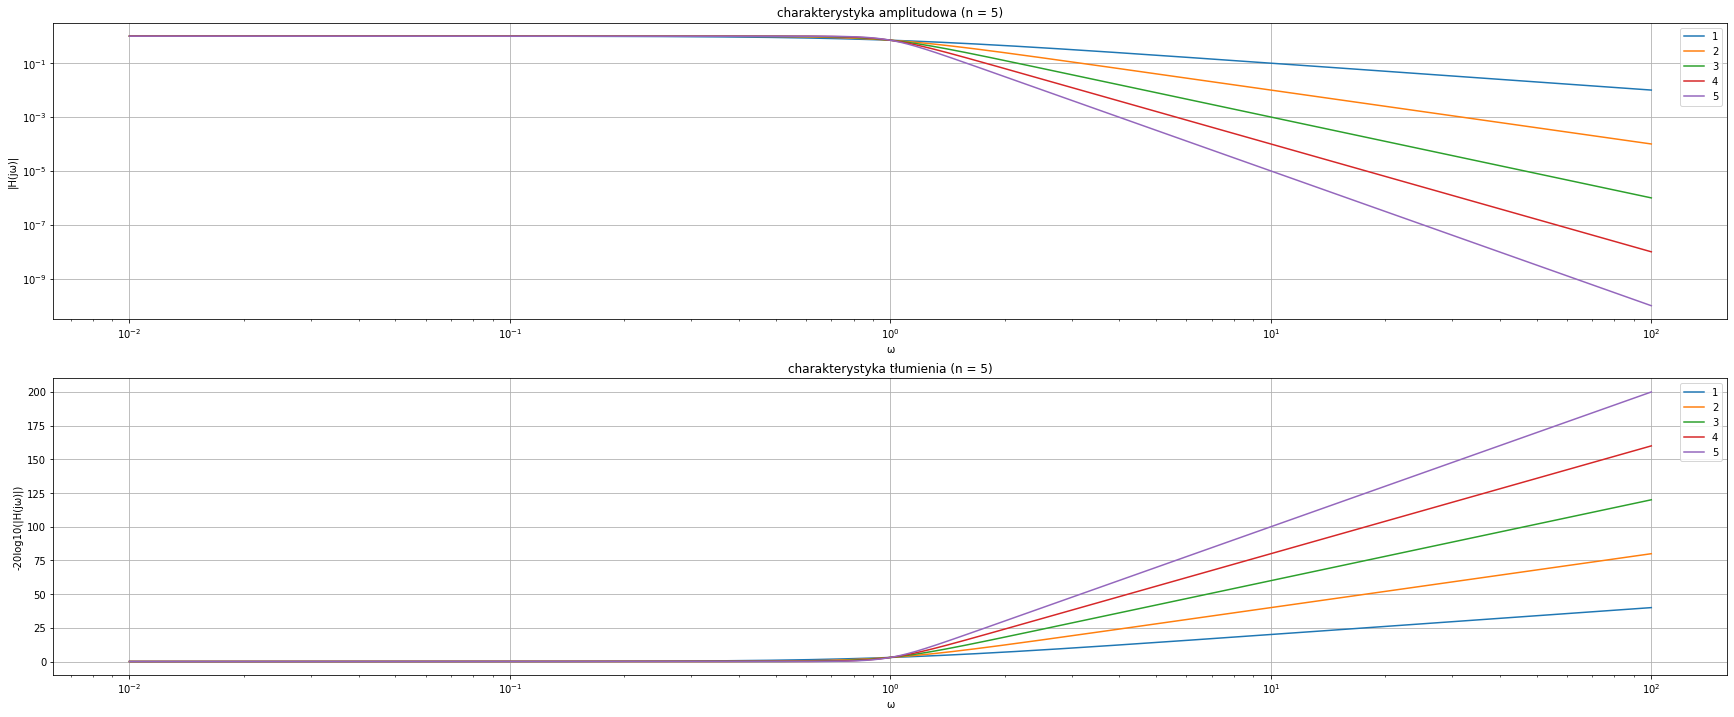

In [3]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    b,a = scipy.signal.butter(i,wp,analog=True)
    
    #calculate transmitance samples and magnitude characteristic
    w, H = scipy.signal.freqs(b,a,w)
    M = np.abs(H, dtype=np.double)
    
    #calculate Attenuation 
    L=-20*np.log10(M)
    
    #calculate attenuation per octave
    w1=10
    w2=20
    H1=np.polyval(b,w1)/np.polyval(a,w1*1j)
    H2=np.polyval(b,w2)/np.polyval(a,w2*1j)
    L1=-20*np.log10(np.abs(H1))
    L2=-20*np.log10(np.abs(H2))
    L_oct=L2-L1
    
    print(L_oct)
    print('tłumienie dla n= %d jest %f' %(i,L_oct))
    
    #display magnitude characteristic
    axs[0].loglog(w, M, label=i)
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w, L, label=i)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[0].legend()
    axs[1].legend()

### Zadanie 2

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Czebyszewa I rodzaju   
    - rząd filtru n (dla n od 1 do 5)  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedź:  
    - wykorzystaj funkcję `scipy.signal.cheby1`, pamiętaj aby zaprojektować filtr analogowy, maksymalne tętnienie (rp, ripple) oznacza  maksymalne tłumienie w paśmie przepustowym  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

5.918664043578332
tłumienie dla n= 1 jest 5.918664
12.067917791399637
tłumienie dla n= 2 jest 12.067918
18.102334876500805
tłumienie dla n= 3 jest 18.102335
24.136447388922292
tłumienie dla n= 4 jest 24.136447
30.17055923789816
tłumienie dla n= 5 jest 30.170559


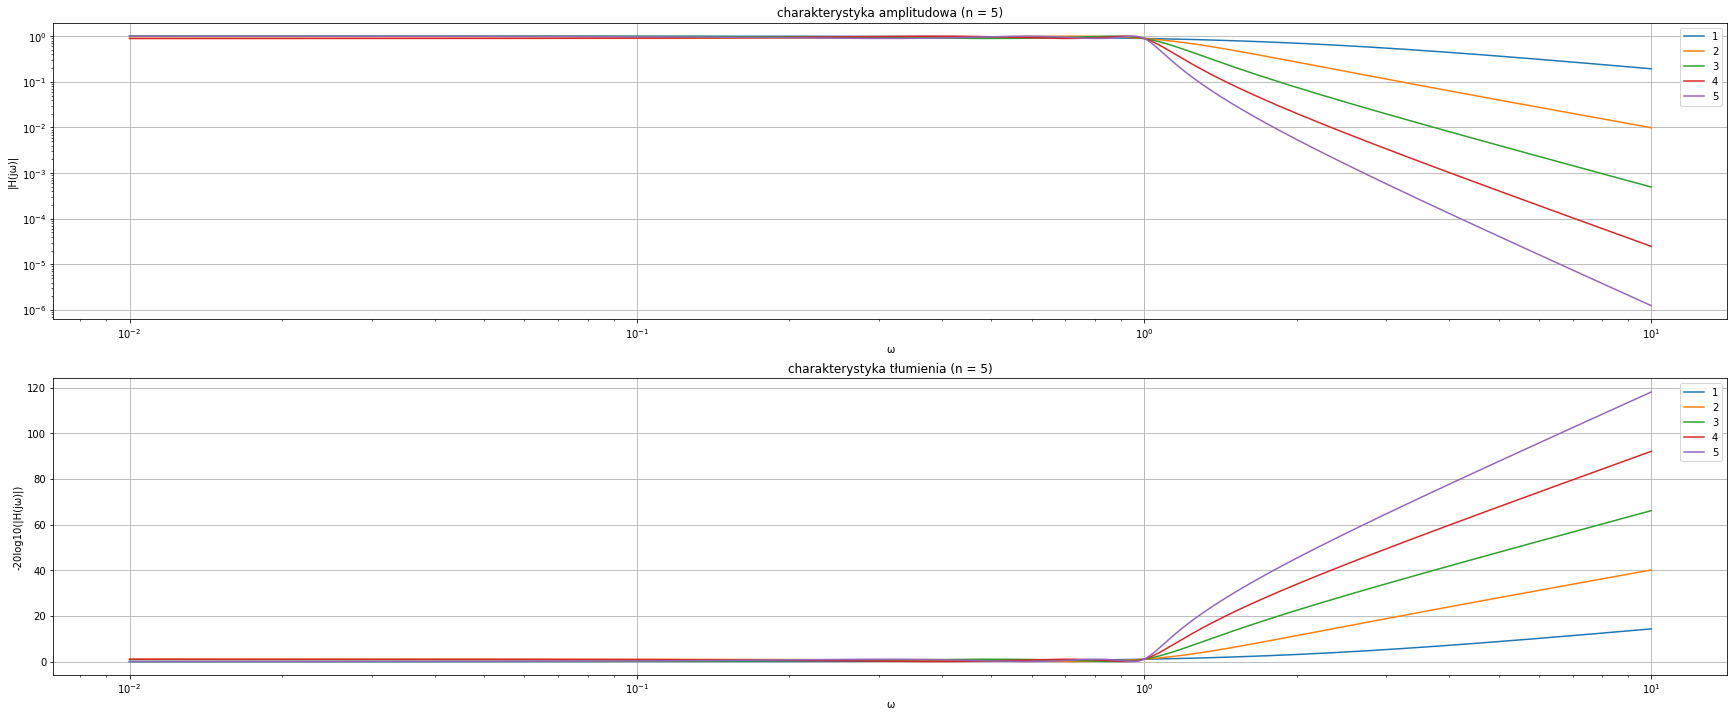

In [8]:
n  = 5
wp = 1
rp=1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,1,10000)

for i in range(1,n+1):    
    #design filter
    b,a = scipy.signal.cheby1(i,rp,wp,analog=True)
    
    #calculate transmitance samples and magnitude characteristic
    w, H = scipy.signal.freqs(b,a,w)
    M = np.abs(H, dtype=np.double)
    
    #calculate Attenuation 
    L=-20*np.log10(M)
    
    #calculate attenuation per octave
    w1=11
    w2=22
    H1=np.polyval(b,w1)/np.polyval(a,w1*1j)
    H2=np.polyval(b,w2)/np.polyval(a,w2*1j)
    L1=-20*np.log10(np.abs(H1))
    L2=-20*np.log10(np.abs(H2))
    L_oct=L2-L1
    print(L_oct)
    print('tłumienie dla n= %d jest %f' %(i,L_oct))
    
    #display magnitude characteristic
    axs[0].loglog(w, M, label=i)
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w, L, label=i)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[0].legend()
    axs[1].legend()

### Zadanie 3  
Porównać charakterystyki amplitudowe i fazowe dla aproksymacji Butterwortha i Czebyszewa I rodzaju:
    - rząd filtru n = 5  
    - pulsacja graniczna ω=1 rad/s  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie)  
    - wykreślić charakterystyki fazowe (na jednym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

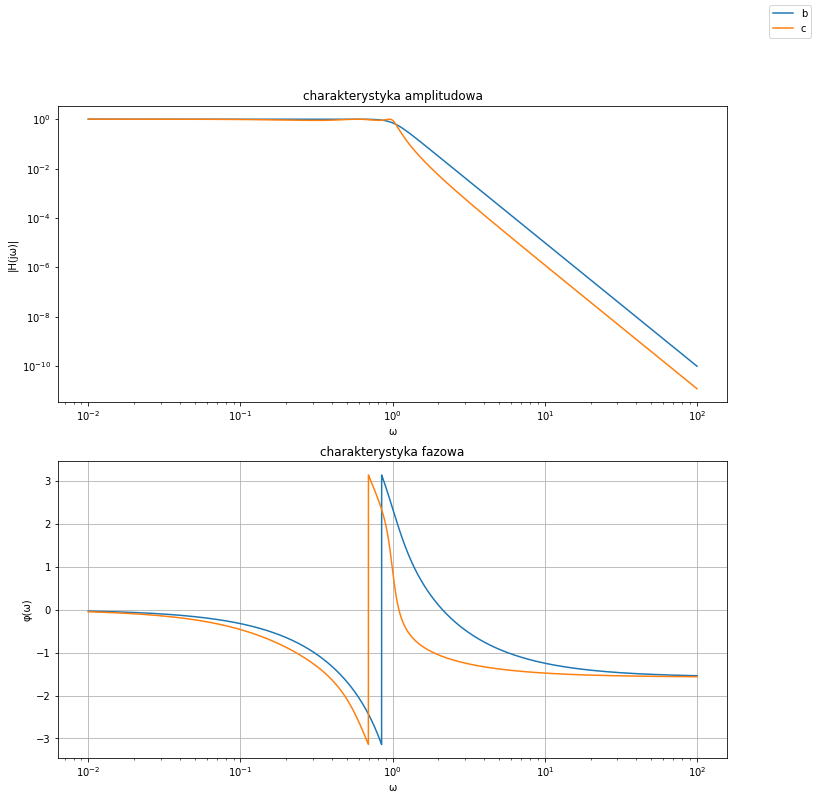

In [19]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#design filter
b,a = scipy.signal.butter(n,wp,analog=True)
    
#calculate transmitance samples and magnitude characteristic
w, H = scipy.signal.freqs(b,a,w)
M = np.abs(H, dtype=np.double)

#calculate phase 
F = np.angle(H)

#Butterworth

#display magnitude characteristic
axs[0].loglog(w,M,label='b')
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,F)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
b,a = scipy.signal.cheby1(n,rp,wp,analog=True)
    
#calculate transmitance samples and magnitude characteristic
w, H = scipy.signal.freqs(b,a,w)
Mc = np.abs(H, dtype=np.double)

#calculate phase 
Fc = np.angle(H)

#display magnitude characteristic
axs[0].loglog(w,Mc,label='c') 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,Fc)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
#axs[1].grid()
fig.legend()

### Zadanie 4

Wyznaczanie minimalnego wymaganego rzędu filtru:  
 ### gabaryty: 
 - a)   αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s  
 - b)   αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
### filtry:  
 - Butterwortha
 - Czebyszewa I rodzaju
 - Czebyszewa II rodzaju
 - Cauer (eliptyczny)

### Podpowiedź : 
 - użyj funkcji: `scipy.signal.buttord`, `scipy.signal.cheb1ord`, `scipy.signal.cheb2ord`, `scipy.signal.ellipord`

In [3]:
# I - case
# αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s 
a_butt=scipy.signal.buttord(wp=3,ws=8,gpass=3,gstop=80,analog=True)[0]
a_cheby1=scipy.signal.cheb1ord(wp=3,ws=8,gpass=3,gstop=80,analog=True)[0]
a_cheby2, w_n_cheby2=scipy.signal.cheb2ord(wp=3,ws=8,gpass=3,gstop=80,analog=True)
a_ellip, w_n_ellip=scipy.signal.ellipord(wp=3,ws=8,gpass=3,gstop=80,analog=True)
print('Order of filters for given params a: Butterworth = %d, Cheby1 = %d, Cheby2 = %d, Ellip = %d'%(a_butt,a_cheby1,a_cheby2,a_ellip))

# II-nd case
# αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
a_butt=scipy.signal.buttord(wp=2,ws=3,gpass=0.5,gstop=100,analog=True)[0]
a_cheby1=scipy.signal.cheb1ord(wp=2,ws=3,gpass=0.5,gstop=100,analog=True)[0]
a_cheby2, w_n_cheby2=scipy.signal.cheb2ord(wp=2,ws=3,gpass=0.5,gstop=100,analog=True)
a_ellip, w_n_ellip=scipy.signal.ellipord(wp=2,ws=3,gpass=0.5,gstop=100,analog=True)
print('Order of filters for given params b: Butterworth = %d, Cheby1 = %d, Cheby2 = %d, Ellip = %d'%(a_butt,a_cheby1,a_cheby2,a_ellip))


Order of filters for given params a: Butterworth = 10, Cheby1 = 7, Cheby2 = 7, Ellip = 5
Order of filters for given params b: Butterworth = 31, Cheby1 = 14, Cheby2 = 14, Ellip = 9


### Zadanie 5   

Korzystając z napisanej w zadaniu 5 funkcji powtórz zadania 1-4 dla filtru górnoprzepustowego.

### Podpowiedź 
- zmień parametr `btype` poszczególnych funkcji na "high"
- pamiętaj, aby zmienić pulsację przy wyznaczniu tłumienia na oktawę tak, aby obliczać je w obszarze zaporowym
 

### Zadanie 6 

Napisz funkcję:
 - wyliczającą rząd filtru dla danej aproksymacji 
 - projektującą filtr (transmitancja) 
 - wykreślanie charakterystyk amplitudowych filtrów wraz z liniami odpowiadającymi gabarytom filtrów 

#### Paniętaj, że dla filtru Czebyszewa II typu, funkcja projektująca transmitancję filtru przyjmuje wartość `ws` jako argument o nazwie `wn` (patrz dokumentacja)

Wyświetl filtry a) i b) z zadania 4 dla wszystkich aproksymacji (na jednym wykresie charakterystyki dla danych gabarytów)

TypeError: iteration over a 0-d array

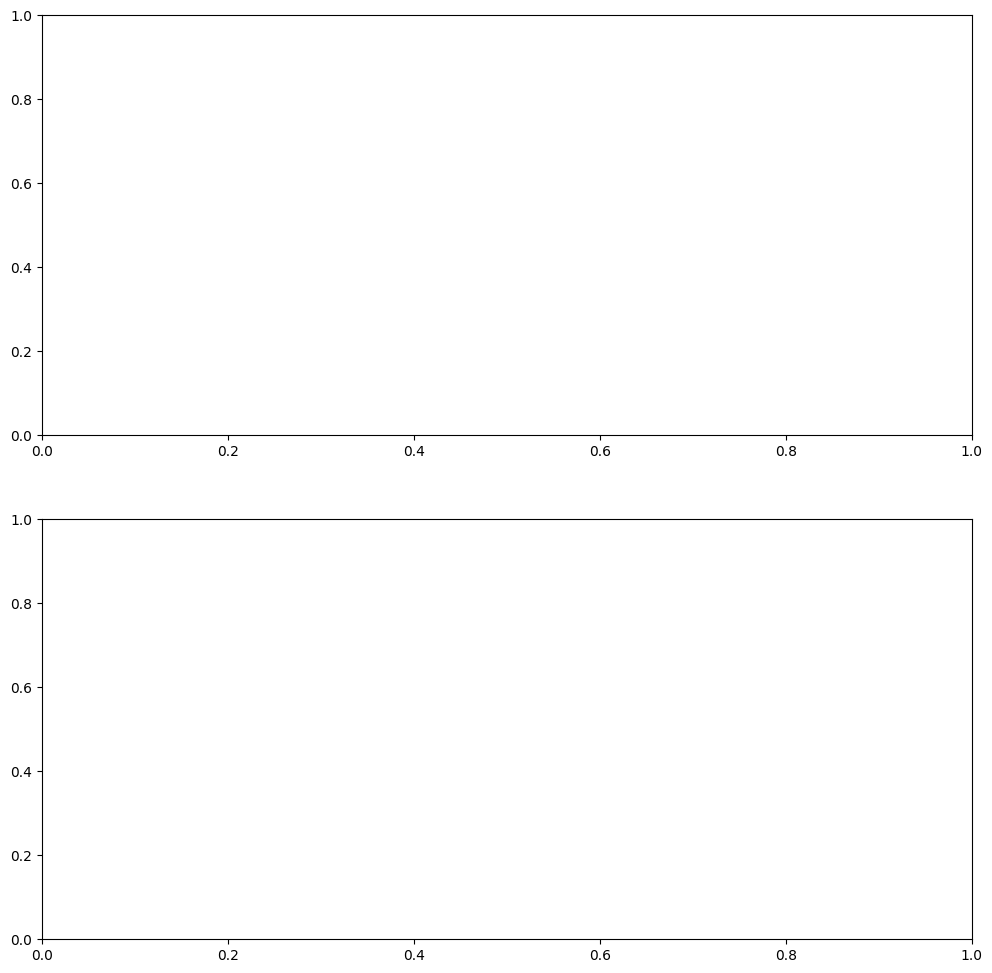

In [2]:
def designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80) : 
    #find order and design filter
    a_cheby2, w_n_cheby2=scipy.signal.cheb2ord(wp=2,ws=3,gpass=0.5,gstop=100,analog=True)
    b,a = scipy.signal.cheb2ord(wp,ws,gpass,gstop,analog=True)
    
    
    fig, axs = plt.subplots(2, 1, figsize=[12,12])    
    #log w vector
    w = np.logspace(-2,2,10000)
    #calculate transmitance samples and magnitude characteristic
    w, H = scipy.signal.freqs(b,a,w)
    Mc = np.abs(H, dtype=np.double)

    #calculate phase 
    Fc = np.angle(H)
    
    #display characteristics
    axs[0].loglog(w,Mc,label='c') 
    axs[0].set_title("charakterystyka amplitudowa")
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w,Fc)
    axs[1].set_title("charakterystyka fazowa")
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("φ(ω)")
    #axs[1].grid()
    fig.legend()
    return
designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80)
